# Cross correlation of DTOCs and ED Breaches

In [96]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
df_dtoc = pd.read_csv('dtoc.csv')
df_dtoc.shape

(80, 10)

In [3]:
df_dtoc.head()

,year,month,total_atten,total_atten_t1,total_atten_>4hr,95%_targ,total_admissions,dtoc_a,dtoc_na,dtoc_total
0,2010-11,August,1719197.000,1138652.000,33184.00000,0.980698,425702.0000,2559,2381,4940
1,2010-11,September,1715117.000,1150728.000,41151.00000,0.976007,424900.0000,2647,2357,5004
2,2010-11,October,1753934.000,1163143.000,47414.00000,0.972967,436215.0000,2513,2075,4588
3,2010-11,November,1604591.000,1111294.571,46436.42857,0.971060,429099.0000,2352,2057,4409
4,2010-11,December,1647823.857,1159203.857,89917.28571,0.945433,452728.7143,1995,1866,3861


dickey fuller test of stationarity

Notes: both are ns - this means that they are non-stationary

In [53]:
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [54]:
check_stationarity(df_dtoc['total_atten_>4hr'])

ADF Statistic: -1.529597
p-value: 0.518823
	1%: -3.516
	5%: -2.899
	10%: -2.587


In [55]:
check_stationarity(df_dtoc['dtoc_total'])

ADF Statistic: 0.603833
p-value: 0.987710
	1%: -3.532
	5%: -2.906
	10%: -2.590


Difference time series

In [87]:
breaches_diff = df_dtoc['total_atten_>4hr'].diff()
dtoc_total_diff = df_dtoc['dtoc_total'].diff()

In [88]:
check_stationarity(breaches_diff.loc[breaches_diff.index > 0])

ADF Statistic: -3.591030
p-value: 0.005935
	1%: -3.529
	5%: -2.904
	10%: -2.590


In [89]:
check_stationarity(dtoc_total_diff.loc[dtoc_total_diff.index > 0])

ADF Statistic: -1.538870
p-value: 0.514203
	1%: -3.532
	5%: -2.906
	10%: -2.590


Still non-stationary!

Cross correlation

In [93]:
corr = signal.correlate(breaches_diff.loc[breaches_diff.index > 0], dtoc_total_diff.loc[dtoc_total_diff.index > 0], mode='same')
corr = corr/np.max(corr)

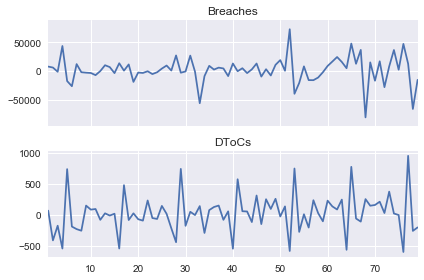

In [97]:
fig, (ax_breaches, ax_dtocs) = plt.subplots(2, 1, sharex=True)
ax_breaches.plot(breaches_diff.loc[breaches_diff.index > 0])
ax_breaches.set_title('Breaches')
ax_dtocs.plot(dtoc_total_diff.loc[dtoc_total_diff.index > 0])
ax_dtocs.set_title('DToCs')
ax_breaches.margins(0, 0.1)
fig.tight_layout()


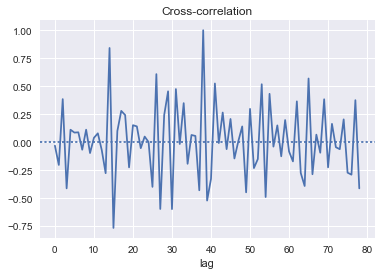

In [98]:
fig, ax_corr = plt.subplots(1, 1, sharex=True)
ax_corr.plot(corr)
ax_corr.set_title('Cross-correlation')
ax_corr.set_xlabel('lag')
ax_corr.axhline(0.0, ls=':')

Notes:
Might need to take 2nd difference.

Note sure what you do about interpretation of significance?